In [1]:
import statistics
import numpy as np
import scipy.stats
import statsmodels.api as sm
from scipy.stats import shapiro
import pandas as pd
import jupyterthemes as jt
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict
from matplotlib.cm import ScalarMappable
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import GammaRegressor
from sklearn._loss.glm_distribution import (
    TweedieDistribution,
    NormalDistribution, PoissonDistribution,
    GammaDistribution, InverseGaussianDistribution,
)
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from yellowbrick.regressor import cooks_distance
from sklearn.metrics import mean_poisson_deviance
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DBtrain.csv', sep = ';')
data

,Unnamed: 0,Gender,DriverAge,CarAge,Area,Leasing,Power,Fract,Contract,Fuel,Exposure,Nbclaims
0,1,1,58,7,4,2,3,1,2,3,1.33,0
1,2,2,48,7,2,2,2,1,2,2,1.09,0
2,3,2,59,4,4,2,2,1,1,1,3.14,0
3,4,1,77,9,2,1,4,3,2,1,1.32,0
4,5,2,48,2,3,2,2,3,1,1,1.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,2,38,3,3,2,2,1,3,4,1.14,0
69996,69997,1,59,3,3,2,1,2,2,2,0.08,0
69997,69998,1,55,5,4,2,2,2,3,2,0.53,0
69998,69999,2,42,4,4,2,2,3,2,2,2.83,0


In [3]:
boost = HistGradientBoostingRegressor(loss='poisson', max_iter=300,learning_rate=0.1,max_depth=1)
X = data.drop(["Unnamed: 0", "Exposure", "Nbclaims"], axis= 1)
Y = data["Nbclaims"]/data["Exposure"]
boost.fit(X,Y)

HistGradientBoostingRegressor(loss='poisson', max_depth=1, max_iter=300)

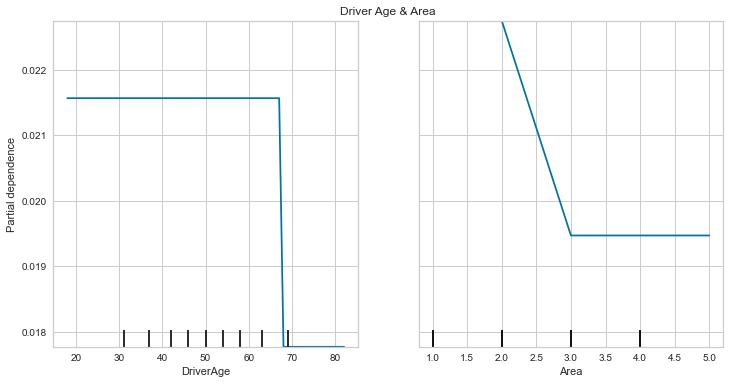

In [4]:
features = ['DriverAge','Area']
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Driver Age & Area")
pdp = PartialDependenceDisplay.from_estimator(boost, X, features, method='brute', ax=ax)

Computing partial dependence plots...


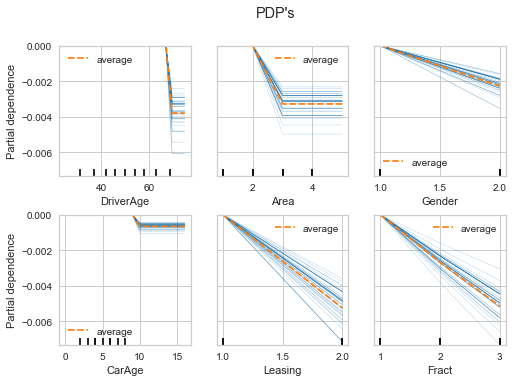

In [5]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 0,
}
print("Computing partial dependence plots...")
display = PartialDependenceDisplay.from_estimator(
    boost,
    X,
    features=["DriverAge", "Area", "Gender", "CarAge", "Leasing", "Fract"],
    kind="both",
    method='brute',
    **common_params,
)
display.figure_.suptitle("PDP's")
display.figure_.subplots_adjust(hspace=0.3)

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/3646016970.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


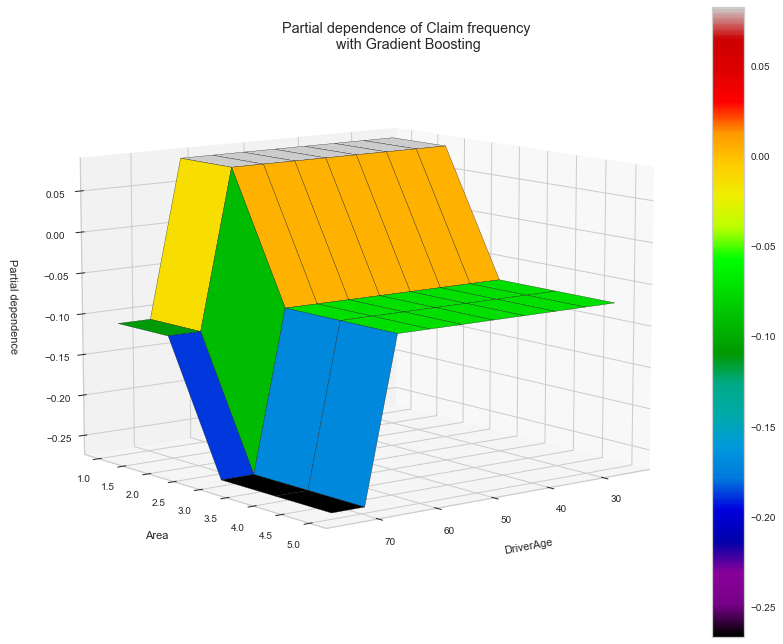

In [6]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Area")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=52)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency\n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.savefig('PDPArea.png',bbox_inches='tight')
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/3952076480.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


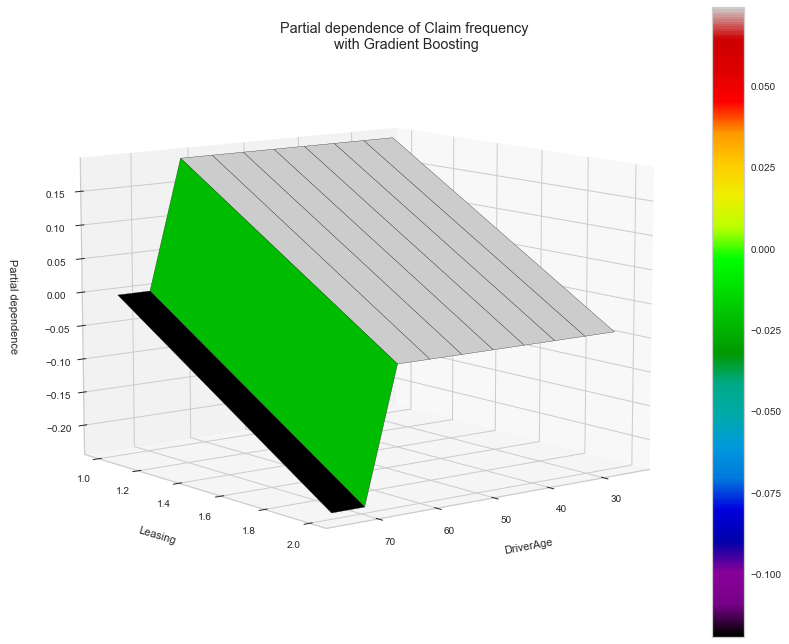

In [7]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Leasing")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=52)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    "with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/3357784351.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


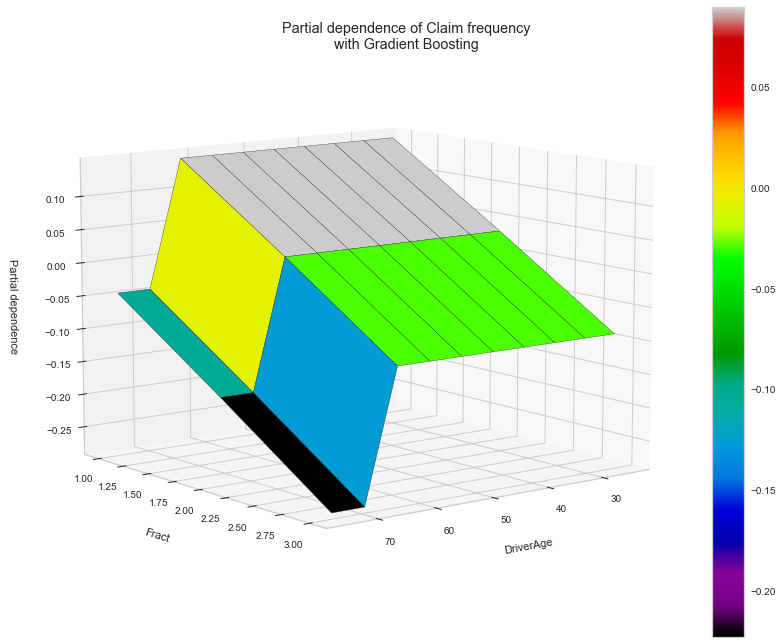

In [8]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Fract")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=52)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency\n"
    "with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/2149979307.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


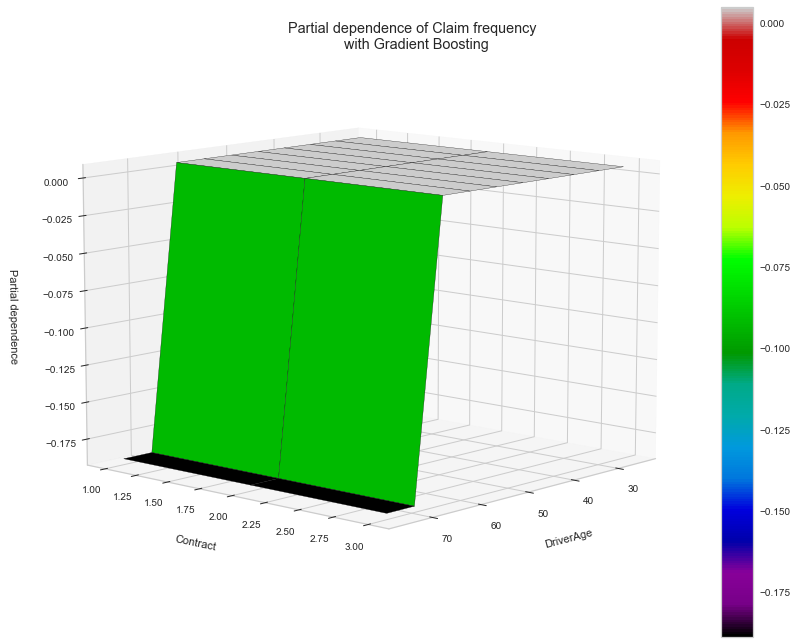

<Figure size 576x396 with 0 Axes>

In [9]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Contract")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=42)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()
plt.savefig('books_read.png')

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/3885078613.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


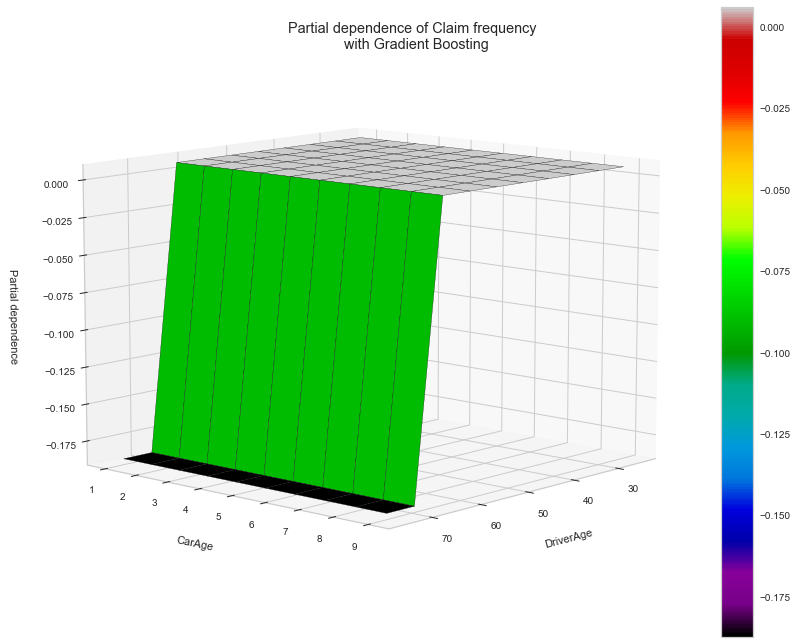

In [10]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "CarAge")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=42)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/903229794.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


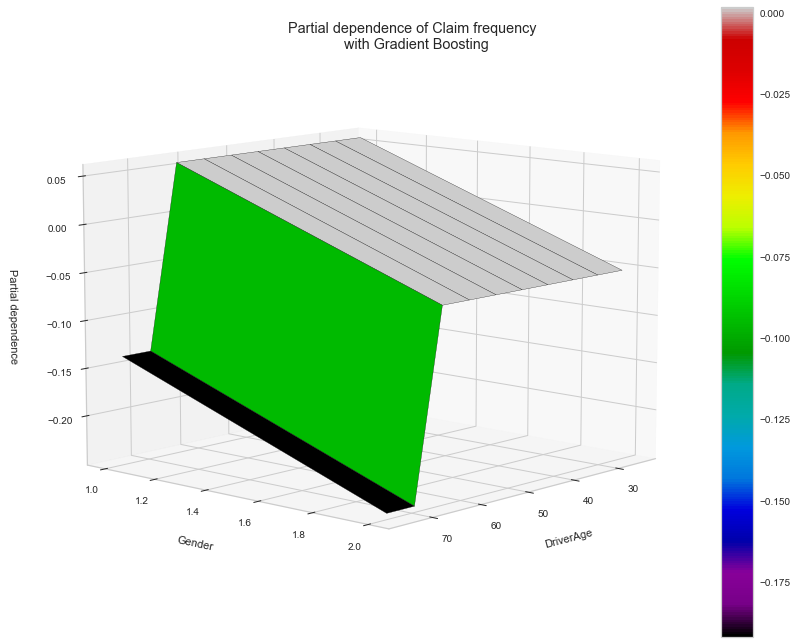

In [11]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Gender")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=42)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/887002335.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


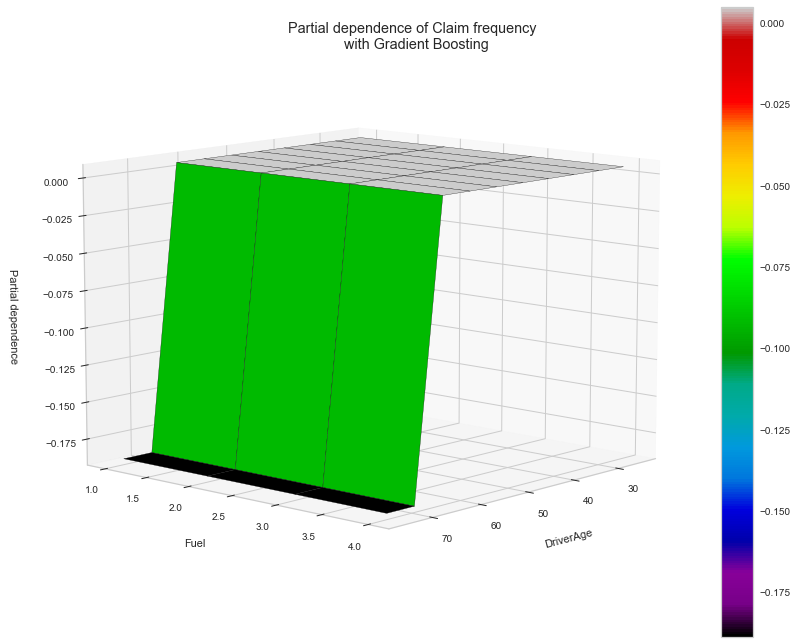

In [12]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Fuel")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=42)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

/var/folders/fr/k59r0qdd3cl3jrjs46kw9pw00000gn/T/ipykernel_70291/783950636.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(surf)


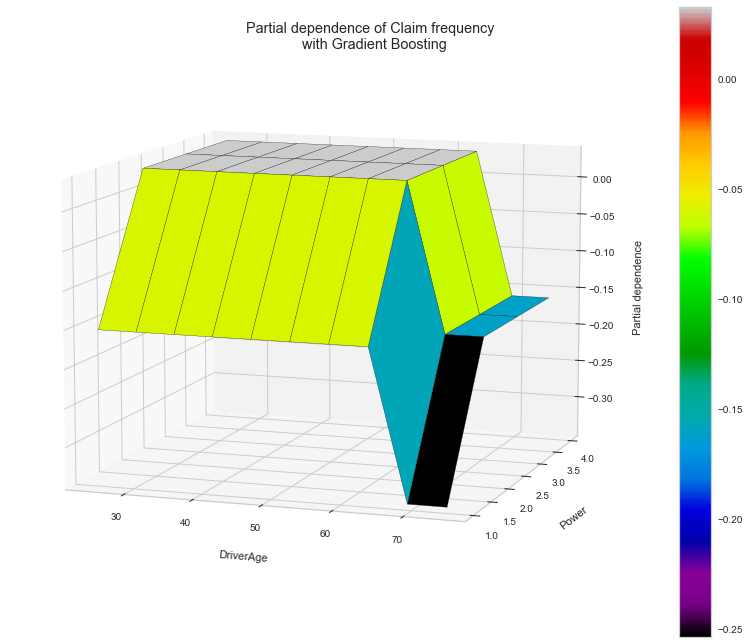

In [13]:
import numpy as np
import mpl_toolkits.mplot3d
from sklearn.inspection import partial_dependence

my_cmap = plt.get_cmap("nipy_spectral")

fig = plt.figure(figsize=(15,10))
features = ("DriverAge", "Power")
pdp = partial_dependence(
    boost, X, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=my_cmap, edgecolor="k")
ax.xaxis.labelpad = 20
ax.set_xlabel(features[0])
ax.yaxis.labelpad = 20
ax.set_ylabel(features[1])
ax.zaxis.labelpad = 20
ax.set_zlabel("Partial dependence")
ax.view_init(elev=10, azim=289)
plt.colorbar(surf)
plt.suptitle("Partial dependence of Claim frequency \n"
    " with Gradient Boosting"
)
plt.subplots_adjust(top=1.0)
plt.show()

Computing partial dependence plots...


<Figure size 1440x720 with 0 Axes>

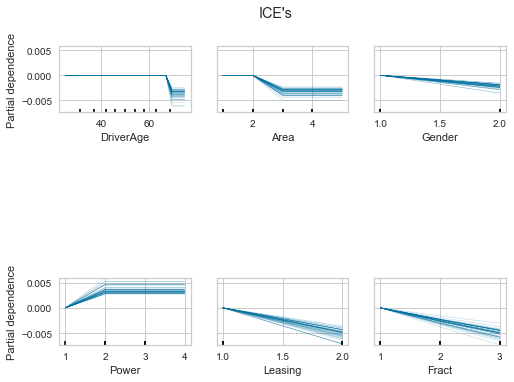

<Figure size 2160x1080 with 0 Axes>

In [14]:
display = plt.figure(figsize=(20,10))

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 0,
}
print("Computing partial dependence plots...")
display = PartialDependenceDisplay.from_estimator(
    boost,
    X,
    features=["DriverAge", "Area", "Gender", "Power", "Leasing", "Fract"],
    kind="individual",
    method='brute',
    **common_params,
)
plt.figure(figsize=(30,15))
display.figure_.suptitle("ICE's")
display.figure_.subplots_adjust(hspace=2.5)

Text(0.5, 1.0, 'Ridge Coefficients vs Regularization Parameters')

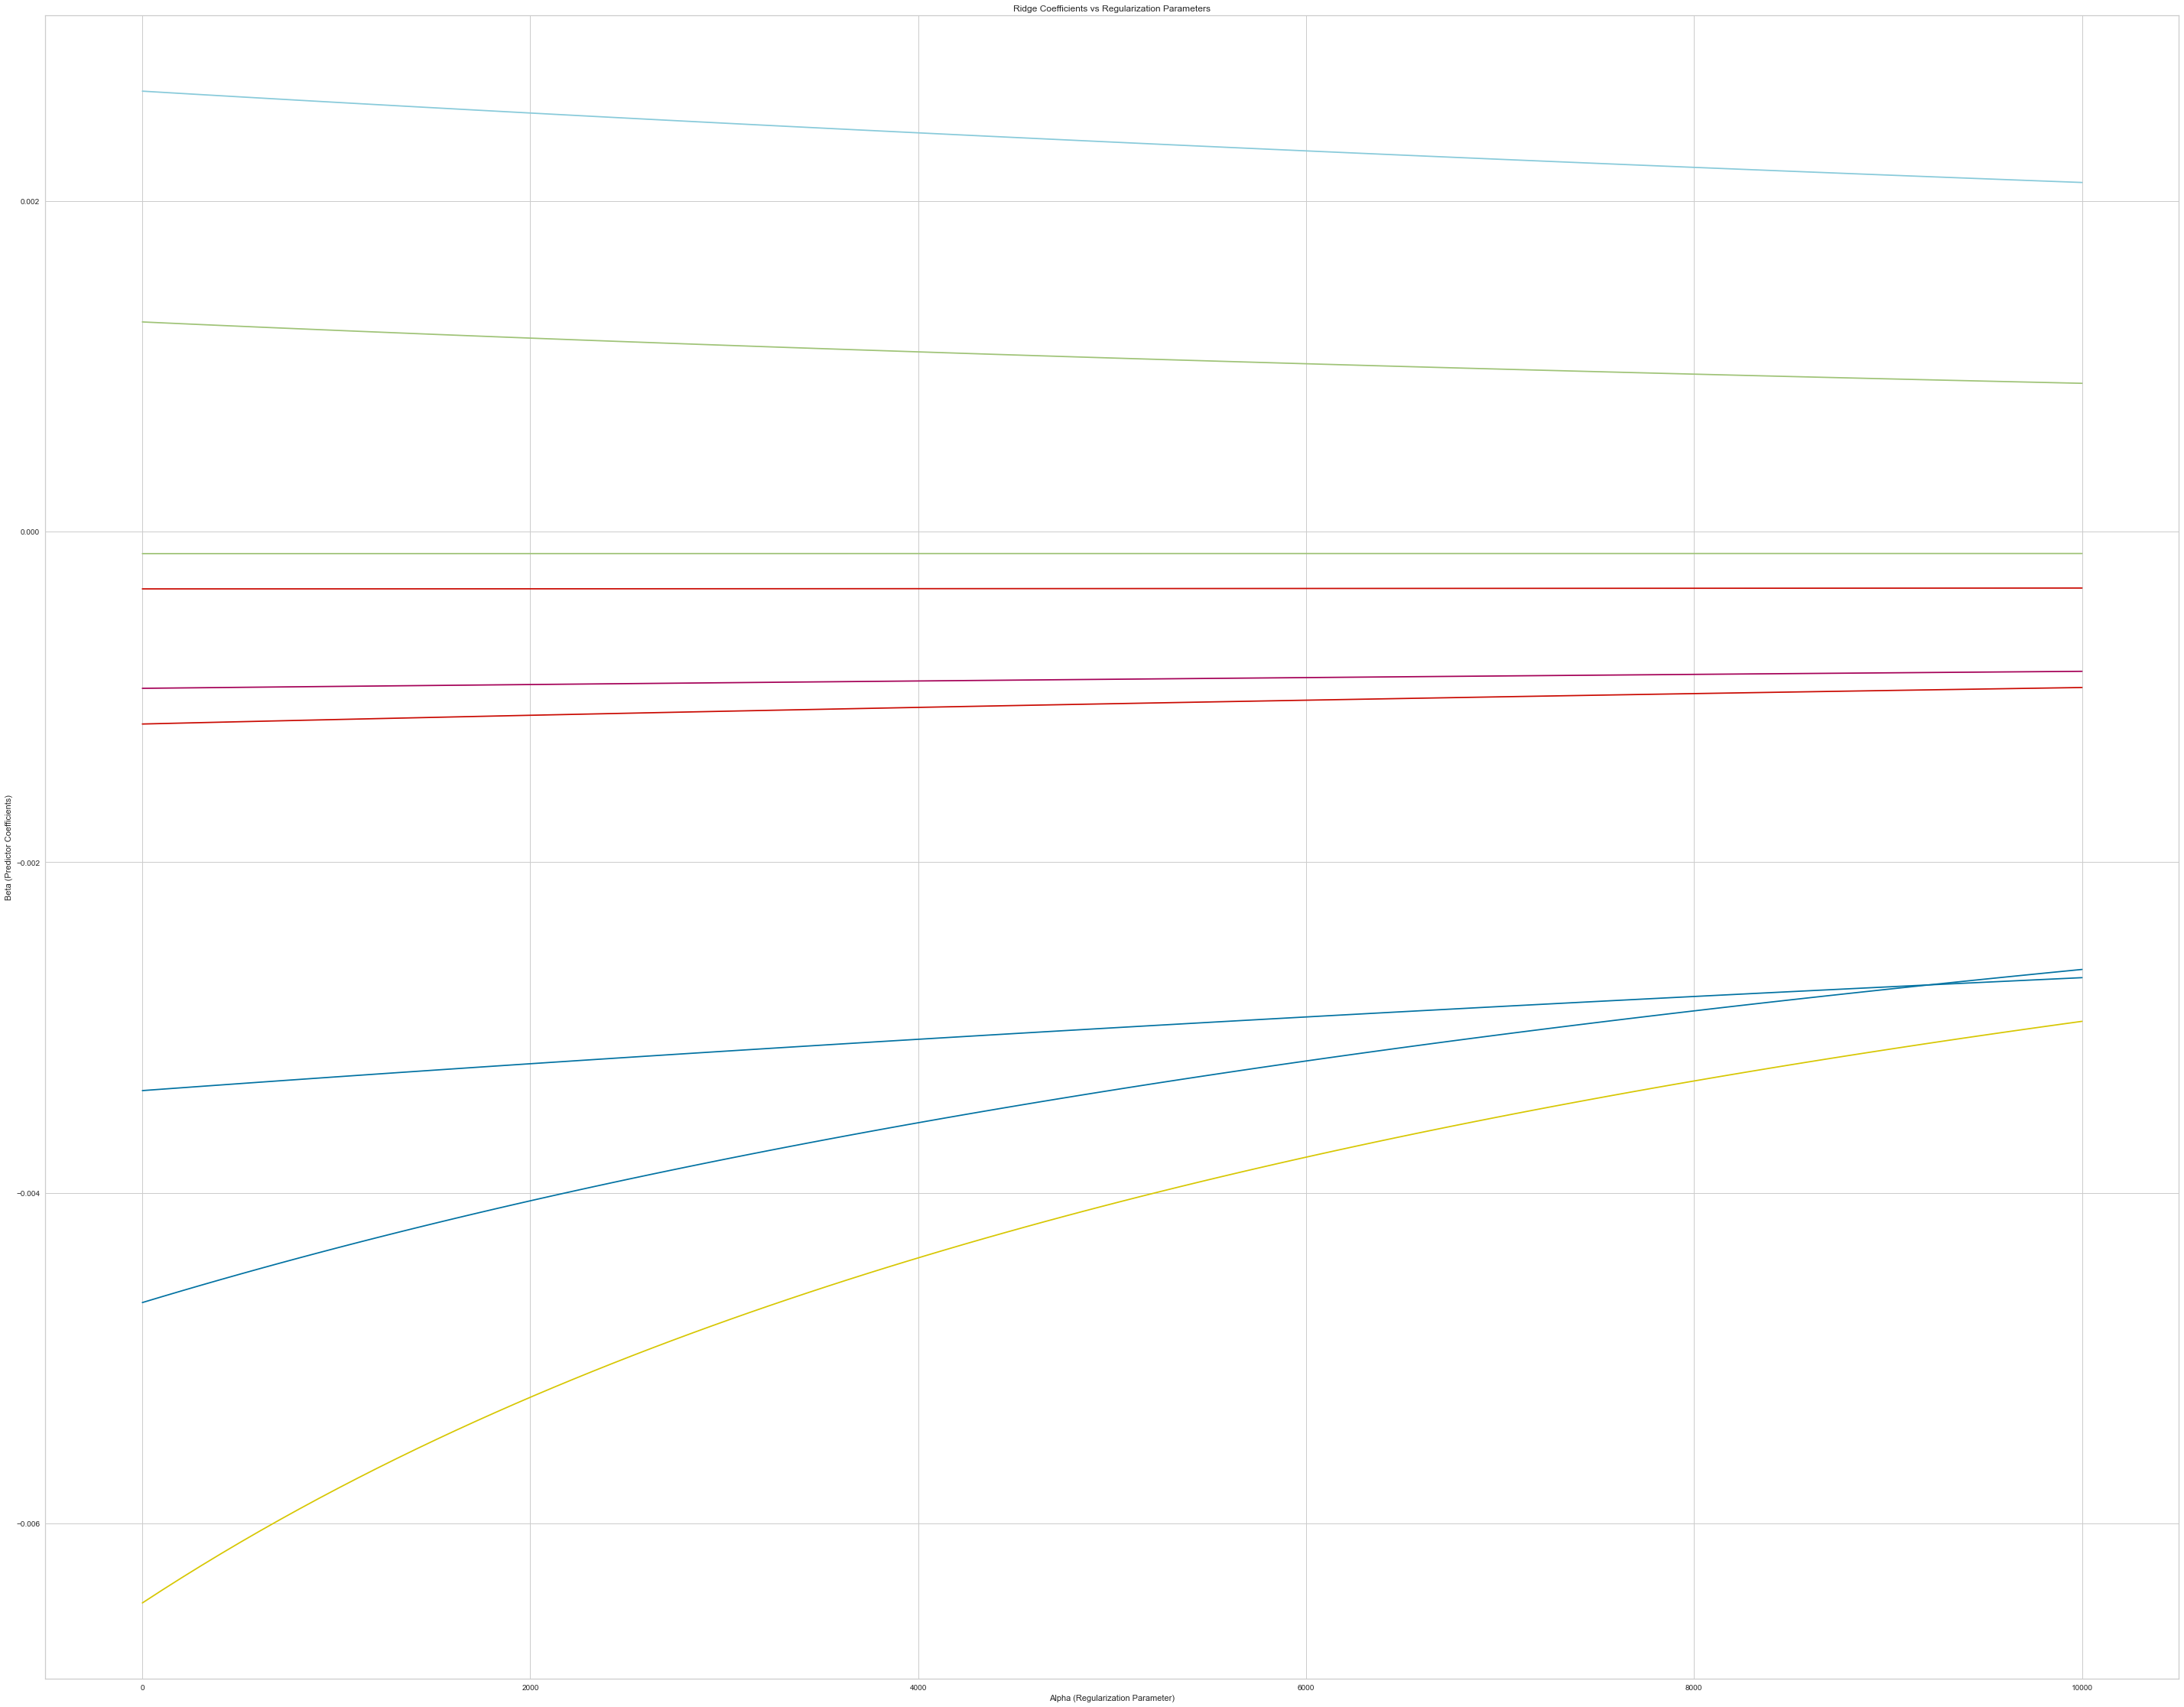

In [15]:
from sklearn import datasets, ensemble, model_selection

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X = X.to_numpy()
Y = Y.to_numpy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state = 10)
coef=[]
alphas = np.linspace(0.01,10000,100)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X_train,y_train)
  coef.append(ridgereg.coef_)
###Make plot of Beta as a function of Alpha
fig=plt.figure(figsize=(50, 40))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')

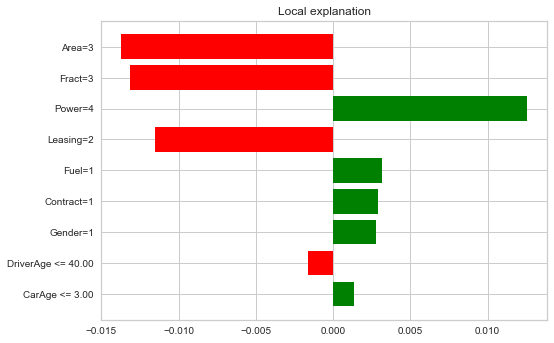

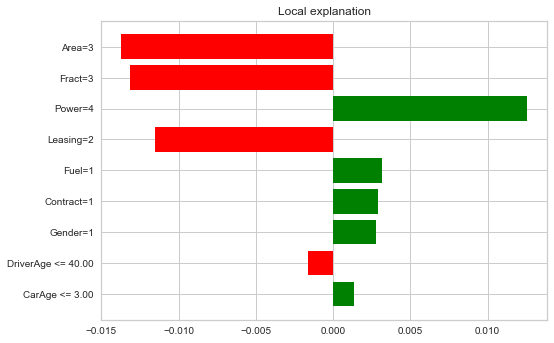

In [32]:
from lime import lime_tabular
from sklearn import datasets, ensemble, model_selection

regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

import numpy as np
categorical_features = [i for i, col in enumerate(X.T)
                        if np.unique(col).size < 7]

explainer = lime_tabular.LimeTabularExplainer(X_train,
                                              mode="regression",
                                              feature_names= ["Gender","DriverAge", "CarAge", "Area", "Leasing", "Power", "Fract", "Contract", "Fuel"],
                                              categorical_features=categorical_features,kernel_width=0.6)
explanation = explainer.explain_instance(X_test[25],regressor.predict, num_features=9, num_samples=10000)
explanation.as_pyplot_figure()

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feat

Exact explainer:  98%|███████████████████████████████▎| 489/500 [00:00<?, ?it/s]X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not 

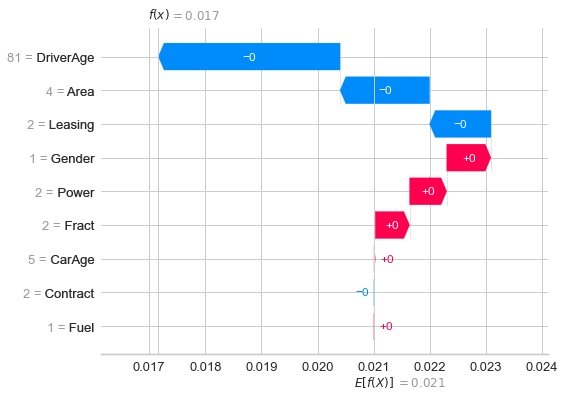

In [44]:
import shap
X_100 = shap.utils.sample(X_train, 500)
explainer = shap.Explainer(boost.predict, X_100, 
                           feature_names= ["Gender","DriverAge", "CarAge", "Area", "Leasing", "Power", "Fract", "Contract", "Fuel"])   
shap_values = explainer(X_100)
shap.plots.waterfall(shap_values[35])

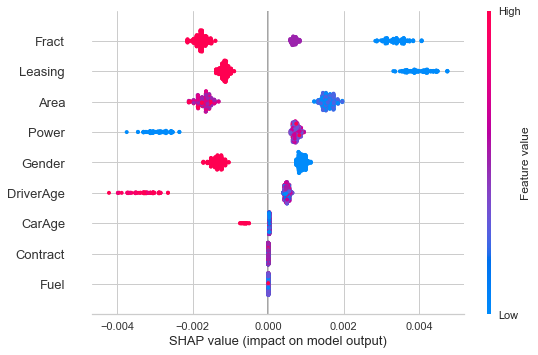

In [50]:
shap.summary_plot(shap_values, X_100, plot_type = "dot")